In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LassoCV,Lasso,Ridge,RidgeCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

In [25]:
Hitters = pd.read_csv('downloads/Hitters.csv')

In [3]:
Hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [26]:
# Name the first column
Hitters.rename(columns={'Unnamed: 0':'Player_Name'},inplace=True)
Hitters.head(5)

,Player_Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [9]:
Hitters.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player_Name  322 non-null    object 
 1   AtBat        322 non-null    int64  
 2   Hits         322 non-null    int64  
 3   HmRun        322 non-null    int64  
 4   Runs         322 non-null    int64  
 5   RBI          322 non-null    int64  
 6   Walks        322 non-null    int64  
 7   Years        322 non-null    int64  
 8   CAtBat       322 non-null    int64  
 9   CHits        322 non-null    int64  
 10  CHmRun       322 non-null    int64  
 11  CRuns        322 non-null    int64  
 12  CRBI         322 non-null    int64  
 13  CWalks       322 non-null    int64  
 14  League       322 non-null    object 
 15  Division     322 non-null    object 
 16  PutOuts      322 non-null    int64  
 17  Assists      322 non-null    int64  
 18  Errors       322 non-null    int64  
 19  Salary  

In [11]:
# Check whether any null values in this dataset

Hitters.isna().sum()

PlayerName     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [13]:
Hitters[Hitters.isnull().any(axis=1)]

,PlayerName,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
15,-Billy Beane,183,39,3,20,15,11,3,201,42,...,20,16,11,A,W,118,0,0,NaN,A
18,-Bruce Bochte,407,104,6,57,43,65,12,5233,1478,...,643,658,653,A,W,912,88,9,NaN,A
22,-Bob Boone,22,10,1,4,2,1,6,84,26,...,9,9,3,A,W,812,84,11,NaN,A
30,-Bobby Grich,313,84,9,42,30,39,17,6890,1833,...,1033,864,1087,A,W,127,221,7,NaN,A
32,-Bob Horner,517,141,27,70,87,52,9,3571,994,...,545,652,337,N,W,1378,102,8,NaN,N
36,-Bobby Meacham,161,36,0,19,10,17,4,1053,244,...,156,86,107,A,E,70,149,12,NaN,A
38,-Ben Oglivie,346,98,5,31,53,30,16,5913,1615,...,784,901,560,A,E,0,0,0,NaN,A
39,-Bip Roberts,241,61,1,34,12,14,1,241,61,...,34,12,14,N,W,166,172,10,NaN,N
41,-Bill Russell,216,54,0,21,18,15,18,7318,1926,...,796,627,483,N,W,103,84,5,NaN,N


In [38]:
# we can find there are multiple rows have null values
# we need to delete them before doing lasso regression

Hitters = Hitters.dropna(axis=0)
Hitters.reset_index(inplace=True,drop=True)
Hitters.isna().sum()

Player_Name    0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary         0
NewLeague      0
dtype: int64

In [80]:
# we just need to select the numeric columns due to requirements
Player_name = Hitters['Player_Name']
New_Hitters = pd.concat([Player_name,Hitters.select_dtypes(np.number)],axis=1)
New_Hitters.head()

,Player_Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
1,-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
2,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
3,-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
4,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [ ]:
###

'''
1.1 Lasso Regression
'''

###

In [81]:
# set the range of regularization penalty value
alphas = 10**np.linspace(4,-4,50)

In [82]:
X = New_Hitters.drop(['Player_Name','Salary'],axis=1)
Y = New_Hitters['Salary']

# Split the dataset

X_train, X_test , y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

The best alpha is:  {'alpha': 2.0235896477251556}
The best score is:  142311.0451420879
The mean squared error for this prediction is:  111182.61126358224


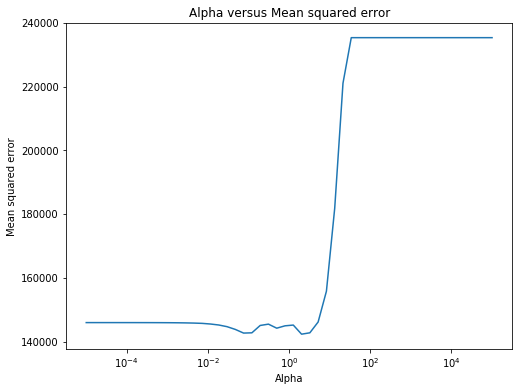

In [186]:
alphas = np.logspace(-5,5,50)
alpha_values = [{'alpha':alphas}]

lasso = GridSearchCV(Lasso(normalize=True),alpha_values,scoring='neg_mean_squared_error',cv=10)
lasso.fit(X_train,y_train)
scores = lasso.cv_results_['mean_test_score'] * (-1)
scores_std = lasso.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.semilogx(alphas, scores)
plt.title('Alpha versus Mean squared error')

print('The best alpha is: ',lasso.fit(X_train,y_train).best_params_)
print('The best score is: ',-lasso.fit(X_train,y_train).best_score_)
print('The mean squared error for this prediction is: ',mean_squared_error(y_test,lasso.predict(X_test)))

AtBat: -0.0
Hits: 0.9817043700349269
HmRun: 0.0
Runs: 0.0
RBI: 0.37693222547105776
Walks: 2.807048206878862
Years: 0.0
CAtBat: 0.0
CHits: 0.0
CHmRun: 0.2889794464560353
CRuns: 0.0
CRBI: 0.49295646982160396
CWalks: 0.0
PutOuts: 0.40027228842706203
Assists: 0.0
Errors: -0.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

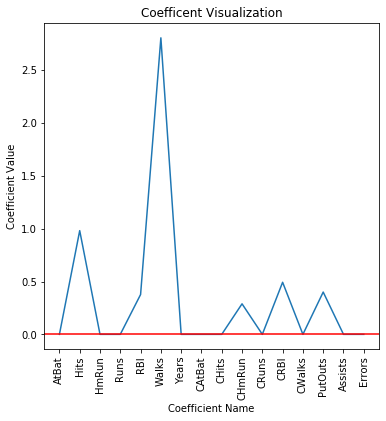

In [184]:
lasso = Lasso(normalize = True)
best_lasso = lasso.set_params(alpha=2.0235896477251556)
best_lasso.fit(X_train,y_train)
best_lasso_coefs = best_lasso.coef_
print('\n'.join('{}: {}'.format(*k) for k in zip(X_train.columns.values,best_lasso.coef_)))
fig = plt.figure(figsize=(6,6))
plt.plot(X_train.columns,best_lasso_coefs)
plt.axhline(0,color='r',linestyle='solid')
plt.title('Coefficent Visualization')
plt.ylabel('Coefficient Value')
plt.xlabel('Coefficient Name')
plt.xticks(rotation=90)

# we can find:
# Hits, RBI, Walks, CHmRun, CRBI, and PutOuts are important

In [177]:
# Use LassoCV double check

lassocv = LassoCV(alphas=alphas,cv=10,max_iter=100000,normalize=True)
lassocv.fit(X_train,y_train)

lasso = lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train,y_train)

print('The best alpha is: ',lassocv.alpha_)
print('The mean squared error on the test set is: ',mean_squared_error(y_test,lasso.predict(X_test)))
print('\n'.join('{}: {}'.format(*k) for k in zip(X_train.columns.values,lasso.coef_)))

# we can find:
# Hits,RBI, Walks, CHmRun, CRBI and PutOuts are important
# this result is exactly same as the GridSearchCV

# the last three variables left are:
# Hits, Walks, and CRBI

The best alpha is:  2.320794416806386
The mean squared error on the test set is:  111156.20484188195
AtBat: 0.0
Hits: 0.9403223686391515
HmRun: 0.0
Runs: 0.0
RBI: 0.4124177793714619
Walks: 2.7628439824544624
Years: 0.0
CAtBat: 0.0
CHits: 0.0
CHmRun: 0.2609834167622124
CRuns: 0.0
CRBI: 0.4919417294438004
CWalks: 0.0
PutOuts: 0.3927502466888882
Assists: 0.0
Errors: -0.0


In [179]:
# The prediction based on X_test

print('The prediction is: ',lasso.predict(X_test))

The prediction is:  [ 599.95759505  220.61792661  582.38559492  514.36151515  393.54752862
  906.78502154  457.40249658  136.02073625  804.96000533  460.34080575
  376.8161518  1209.41340159  427.72978984  763.41259589  684.72825699
  182.95668857  839.09221581  562.83000625  282.07190311  465.64646508
  262.60164856  331.94133164  596.42160501  326.11938328  621.65072474
  566.12802146 1000.64402519  717.36637646  867.82134693  454.79519802
  613.91016034  377.9785369   506.60630089  318.84327196  633.99871605
  392.48895441  975.62900832  658.71235267  289.17542996  625.82607789
  383.45448302  430.75495016  679.33999397  844.61284718  437.75654117
  637.13855893  236.49224657  309.93679853  626.91151829  204.91918183
  282.18943647  459.26418182  542.74659001  923.87396714  377.60838776
  690.85478275  837.39727867  320.23076549  341.20439076  418.10826398
  836.08766837  173.94285975  458.17642359  434.43661637  673.19366047
  675.7629735   435.79336237  511.01520781  430.7807705  

In [181]:
###

'''
Ridge Regression
'''

###

'\nRidge Regression\n'

The best alpha is:  {'alpha': 0.49417133613238384}
The best score is:  136926.70596344583
The mean squared error for this prediction is:  104965.74606856567


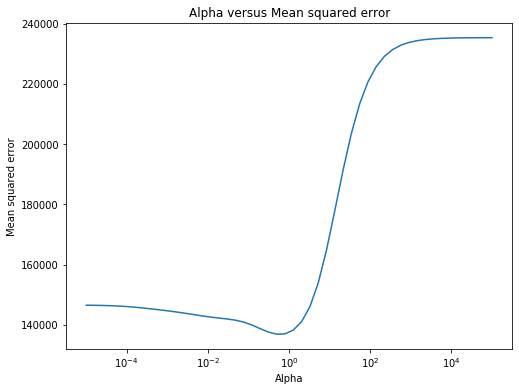

In [187]:
alphas = np.logspace(-5,5,50)
alpha_values = [{'alpha':alphas}]

ridge = GridSearchCV(Ridge(normalize=True),alpha_values,scoring='neg_mean_squared_error',cv=10)
ridge.fit(X_train,y_train)
scores = ridge.cv_results_['mean_test_score'] * (-1)
scores_std = ridge.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.semilogx(alphas, scores)
plt.title('Alpha versus Mean squared error')

print('The best alpha is: ',ridge.fit(X_train,y_train).best_params_)
print('The best score is: ',-ridge.fit(X_train,y_train).best_score_)
print('The mean squared error for this prediction is: ',mean_squared_error(y_test,ridge.predict(X_test)))

AtBat: 0.092862632517067
Hits: 0.5647044968034824
HmRun: 1.28877468469914
Runs: 0.7537066894422082
RBI: 1.0552145949162424
Walks: 1.3313475737866933
Years: 2.7097355845241045
CAtBat: 0.009053317132846524
CHits: 0.041217958676072856
CHmRun: 0.3410306888646754
CRuns: 0.08501574503143007
CRBI: 0.08808875703445085
CWalks: 0.09755199414941196
PutOuts: 0.16366058726466692
Assists: -0.0012930123925000982
Errors: 0.4284785576961442


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

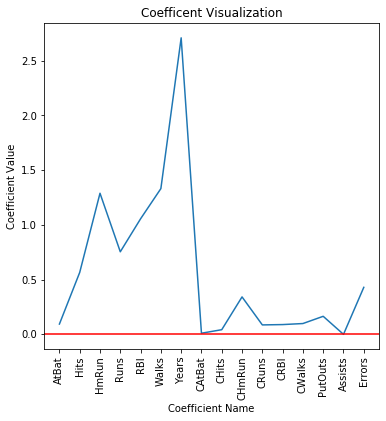

In [185]:
ridge = Ridge(normalize = True)
best_ridge = ridge.set_params(alpha=2.0235896477251556)
best_ridge.fit(X_train,y_train)
best_ridge_coefs = best_ridge.coef_
print('\n'.join('{}: {}'.format(*k) for k in zip(X_train.columns.values,best_ridge.coef_)))
fig = plt.figure(figsize=(6,6))
plt.plot(X_train.columns,best_ridge_coefs)
plt.axhline(0,color='r',linestyle='solid')
plt.title('Coefficent Visualization')
plt.ylabel('Coefficient Value')
plt.xlabel('Coefficient Name')
plt.xticks(rotation=90)

In [ ]:
###

'''
2.Short Answer
'''

###

/1. Bias is the difference between out prediction from model and the true value

/2. Variance is the flucturation of model prediction for a given data point

If the model is too simple(high bias and low variance), we will meet underfitting problem. But if the model is too complex like too much parameters(low bias but high variance), we will meet overfitting problem. So we need to find a balance bwteen bias and variance.

Both Lasso and Ridge impose penalty on the size of coefficients. Regularization adjusts the over-fitted model to reduce variance by introducing a small bias

we can use the plot from Ridge model as an example:

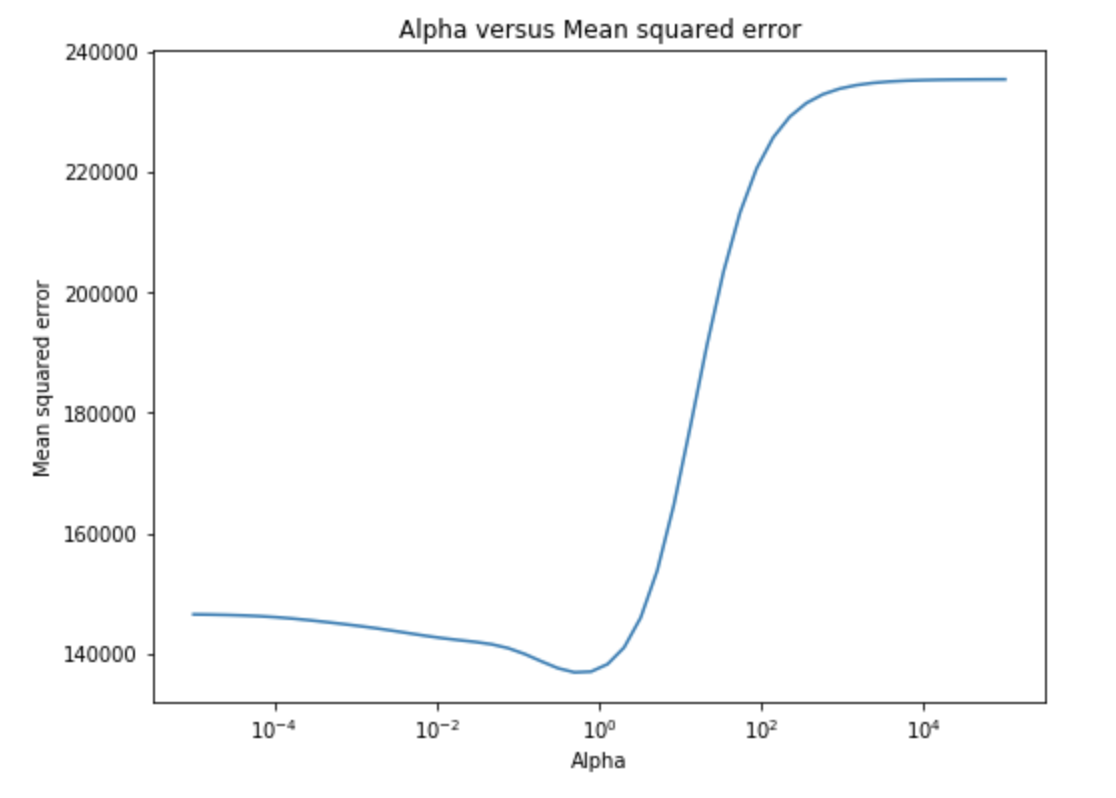

when alpha is really small, like 10^-4, this model is high bias and low variance, when alpha is pretty high, like 10^4, this model is low bias but high variance.

But when we choose the best alpha detremined from cross validation, there will be a balance between bias and variance.